In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from ucimlrepo import fetch_ucirepo, list_available_datasets #Import ucidatasets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from matplotlib import pyplot as plt

In [2]:
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 

In [3]:
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables)

X = pd.get_dummies(X)

X.head()

#y.head()

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#print("y_pred: ",
        #y_pred)


In [6]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy : ",
        accuracy_score(y_test, y_pred)*100)
print("Report : \n",
        classification_report(y_test, y_pred))

Confusion Matrix: 
 [[104   0   6   1]
 [  4  18   0   0]
 [  8   0 360   0]
 [  1   1   0  16]]
Accuracy: 0.9595375722543352
Accuracy :  95.95375722543352
Report : 
               precision    recall  f1-score   support

         acc       0.89      0.94      0.91       111
        good       0.95      0.82      0.88        22
       unacc       0.98      0.98      0.98       368
       vgood       0.94      0.89      0.91        18

    accuracy                           0.96       519
   macro avg       0.94      0.91      0.92       519
weighted avg       0.96      0.96      0.96       519



[Text(0.7835847701149425, 0.9666666666666667, 'persons_2 <= 0.5\ngini = 0.461\nsamples = 1209\nvalue = [273, 47, 842, 47]\nclass = unacc'),
 Text(0.7720905172413793, 0.9, 'safety_low <= 0.5\ngini = 0.579\nsamples = 814\nvalue = [273.0, 47.0, 447.0, 47.0]\nclass = unacc'),
 Text(0.7605962643678161, 0.8333333333333334, 'buying_vhigh <= 0.5\ngini = 0.629\nsamples = 555\nvalue = [273, 47, 188, 47]\nclass = acc'),
 Text(0.6016522988505747, 0.7666666666666667, 'buying_high <= 0.5\ngini = 0.631\nsamples = 413\nvalue = [221, 47, 98, 47]\nclass = acc'),
 Text(0.4331896551724138, 0.7, 'maint_low <= 0.5\ngini = 0.626\nsamples = 277\nvalue = [153, 47, 30, 47]\nclass = acc'),
 Text(0.2600574712643678, 0.6333333333333333, 'maint_med <= 0.5\ngini = 0.526\nsamples = 211\nvalue = [139.0, 18.0, 27.0, 27.0]\nclass = acc'),
 Text(0.15229885057471265, 0.5666666666666667, 'lug_boot_small <= 0.5\ngini = 0.39\nsamples = 145\nvalue = [110, 0, 25, 10]\nclass = acc'),
 Text(0.09770114942528736, 0.5, 'maint_vhigh

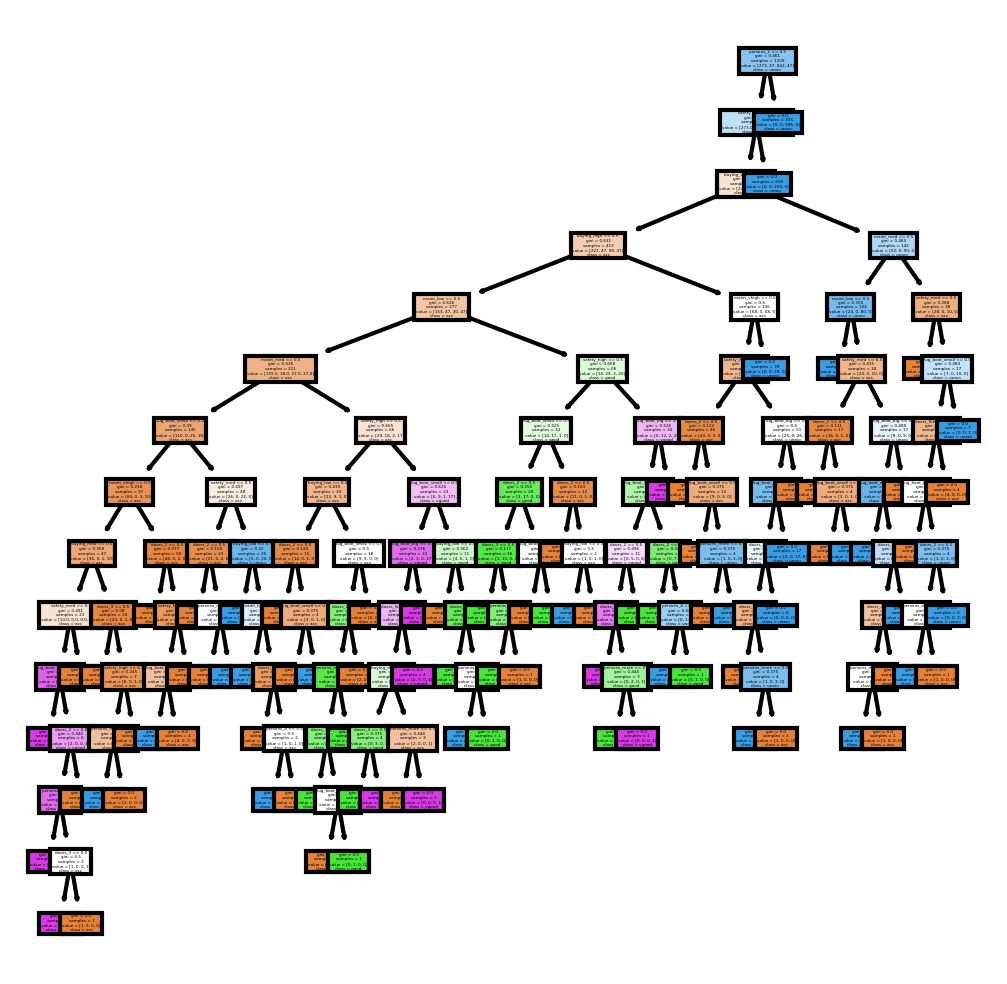

In [7]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = X.columns.tolist(), 
           class_names= ['acc', 'good', 'unacc', 'vgood' ],
           filled = True)

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Accuracy : ",
        accuracy_score(y_test, y_pred)*100)
print("Report : \n",
        classification_report(y_test, y_pred))

Confusion Matrix: 
 [[ 97   1  12   1]
 [  4  17   1   0]
 [  7   0 361   0]
 [  0   3   0  15]]
Accuracy: 0.9441233140655106
Accuracy :  94.41233140655106
Report : 
               precision    recall  f1-score   support

         acc       0.90      0.87      0.89       111
        good       0.81      0.77      0.79        22
       unacc       0.97      0.98      0.97       368
       vgood       0.94      0.83      0.88        18

    accuracy                           0.94       519
   macro avg       0.90      0.87      0.88       519
weighted avg       0.94      0.94      0.94       519



<module 'matplotlib.pyplot' from 'C:\\Users\\Drewn\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

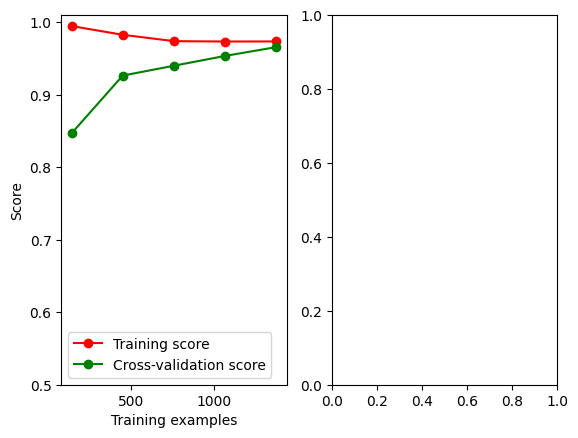

In [14]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))

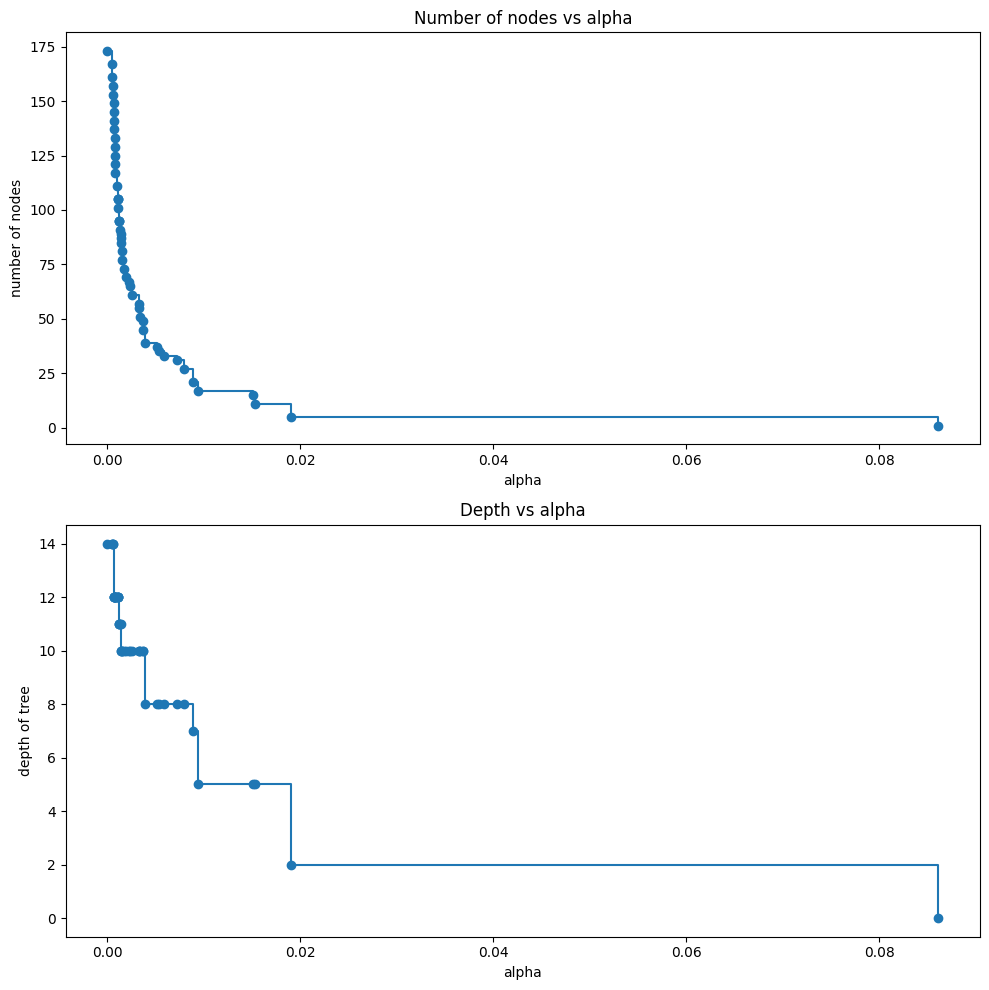

In [55]:
ccp_alphas= clf.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
ccp_alphas
clf_dts = []#created an array that we put decision tree into

for ccp_alpha in ccp_alphas :
    clf=DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)
train_scores= [ clf.score(X_train, y_train ) for  clf in clf_dts]
test_scores = [clf.score(X_test, y_test) for clf in clf_dts]
node_counts = [clf.tree_.node_count for clf in clf_dts]
depth = [clf.tree_.max_depth for clf in clf_dts]
fig, ax = plt.subplots(2, 1, figsize =(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

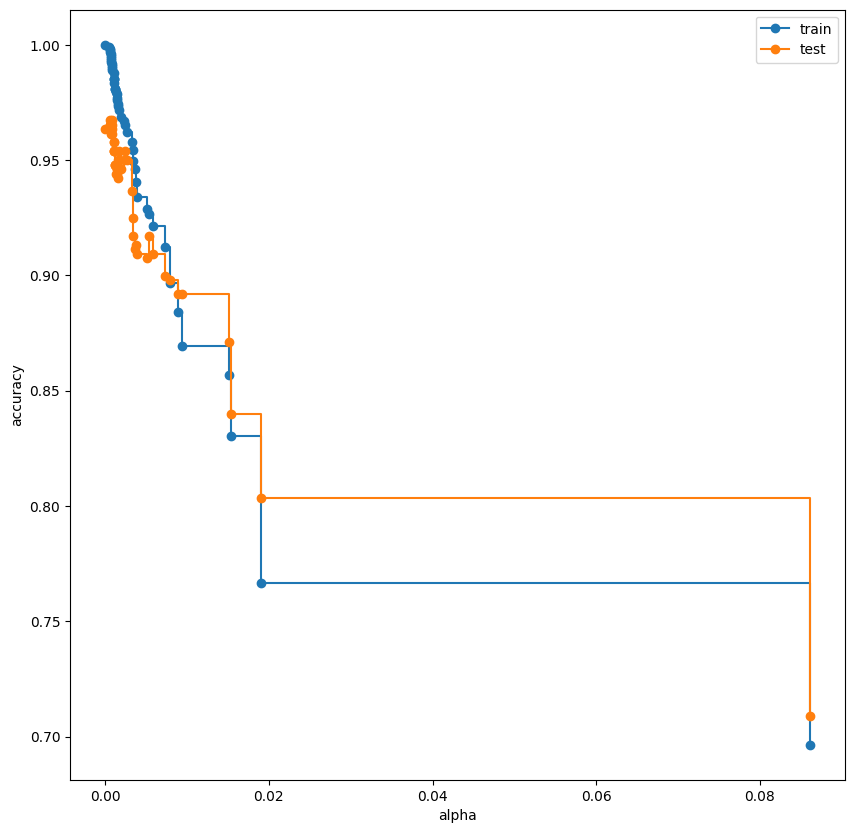

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.plot(ccp_alphas, train_scores, marker = 'o' , label='train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o' , label='test', drawstyle = 'steps-post')

ax.legend()
plt.show()

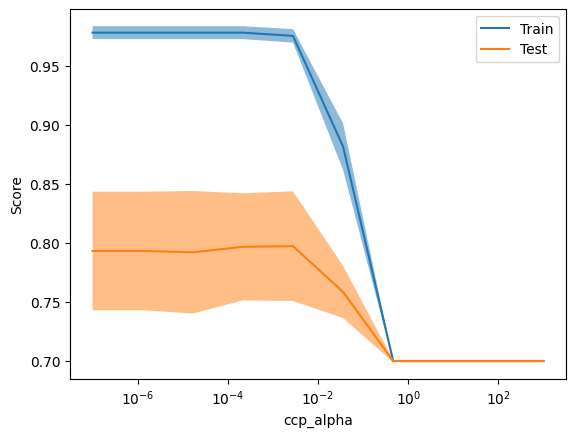

In [30]:
ValidationCurveDisplay.from_estimator(
   clf, X, y, param_name="ccp_alpha", param_range=np.logspace(-7, 3, 10)
)